## Introduction
Detecting hooting and other calls in a natural audio scene is difficult, as there are currently no standard methods for applying pattern recognition or other methods to bird vocalization (Bardell et al., 2010). However, detecting simple calls such as the hooting of tawny owls should be relatively straighforward, as hooting has a characteristic peak frequency which is different from the call frequency of females, juveniles and alarm calls. A prerequisite is that the data set has been compiled by experienced human observers, who have already added a species identification to the recording.

## Data
A data set was obtained from xeno-canto, containing ten audio observations of tawny owls. Five of these observations record a hooting call, the remaining observations record a non-hooting call. Only recordings with a good (i.e. "A") quality estimation and without postprocessing, such as high-pass filters, where selected.

Two examples were plotted using the packages seewave (Sueur, Aubin, Simonis, 2008) and tuneR (Ligges et al., 2018).

In [1]:
library(tools)
library(tuneR)
library(seewave)

saved <- options(repr.plot.width=12, repr.plot.height=6)

convert <- function(mp3filepath) {
    basefilepath <- file_path_sans_ext(mp3filepath)
    wavfilepath <- paste0(basefilepath, ".wav")
    if (!file.exists(wavfilepath)) {
        cmd <- paste("sox", mp3filepath, "-r 22050 -c 1", wavfilepath)
        system(cmd)
    }
    return(wavfilepath)
}

# Plot the spectrogram of a wav file
# filename: path to a wav file
# tlim: start end of plot in seconds, e.g. c(0, 15)
plotSpectrogram <- function(filename, tlim=NULL) {
    s1<-readWave(filename)
    spectro(s1, palette=reverse.gray.colors.1, scale=FALSE,osc=TRUE,collevels=seq(-80,0,1),fastdisp=TRUE,tlim=tlim)
}

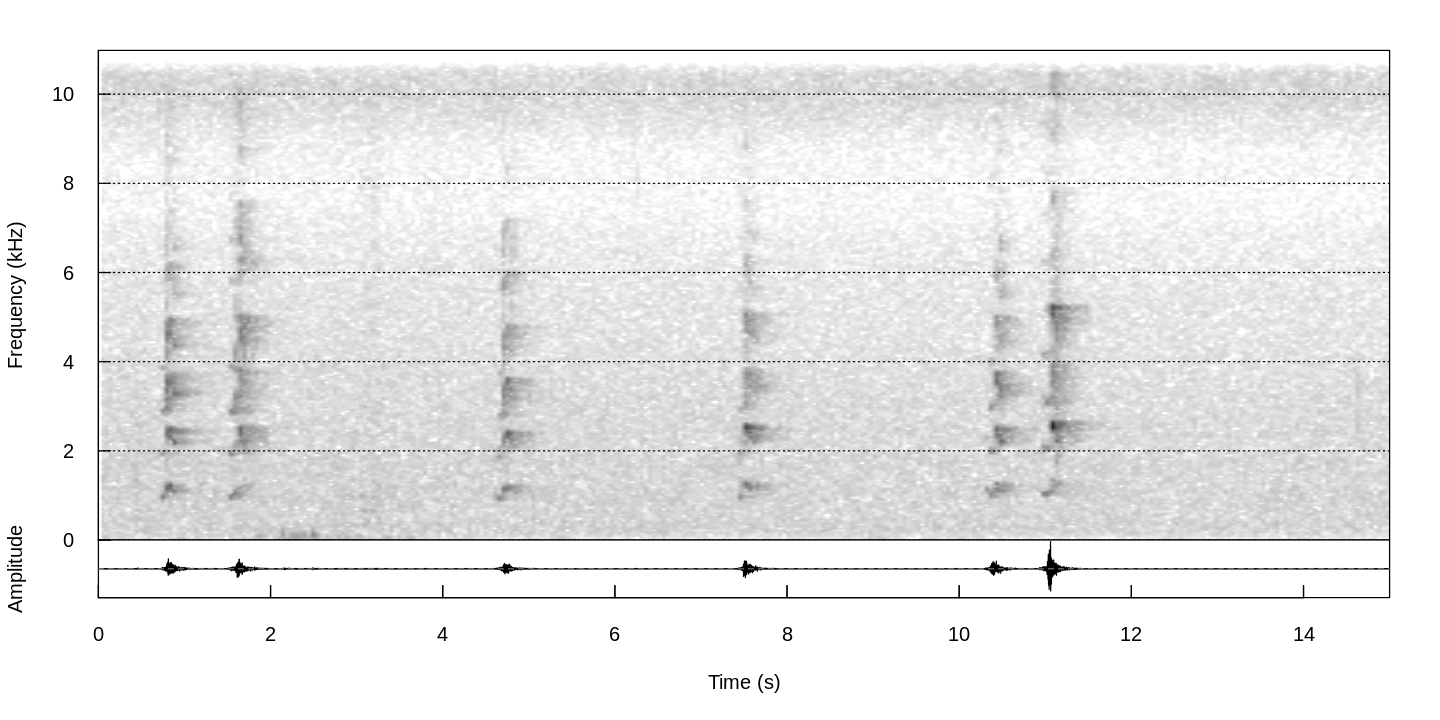

In [14]:
wavfilepath <- convert("./audio/call_XC488332.mp3")
plotSpectrogram(wavfilepath, c(0,15))

Tawny owl call. Peter van Vlaardingen, XC488332. Accessible at www.xeno-canto.org/488332.

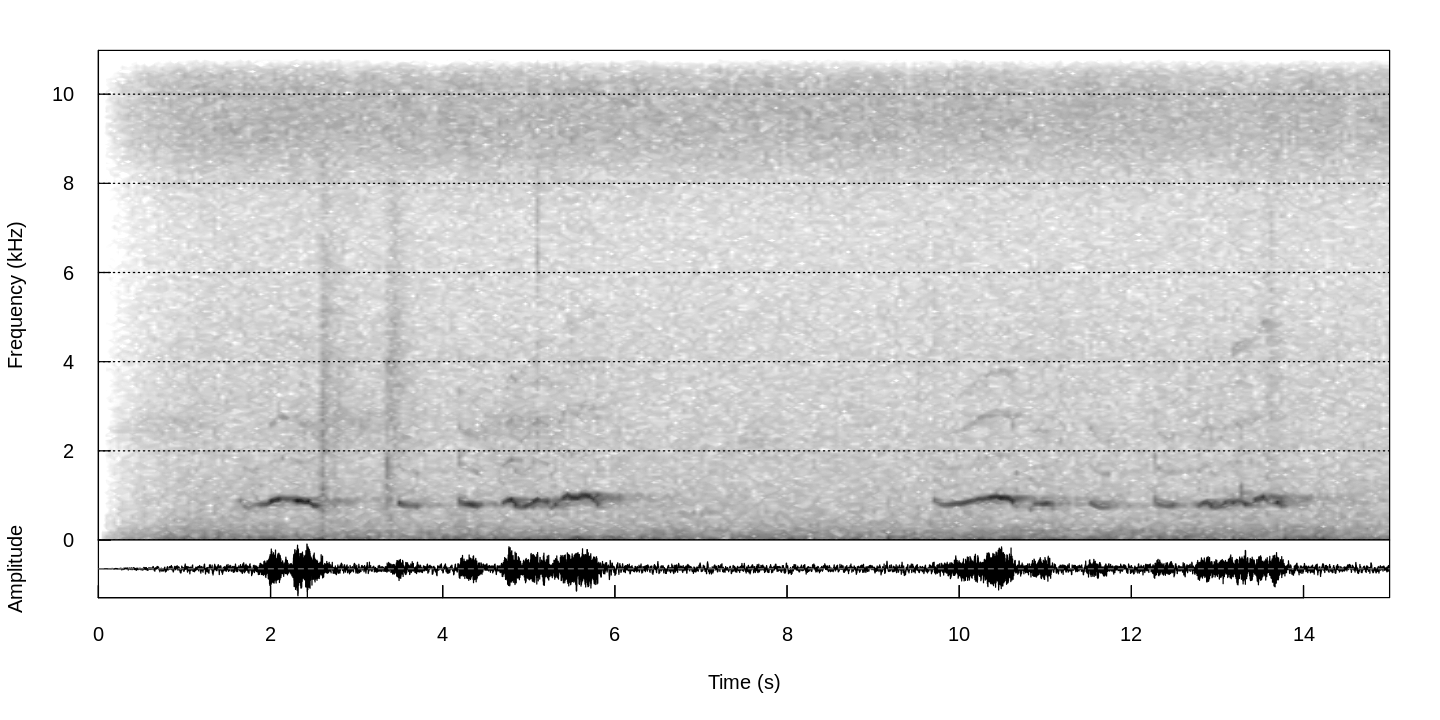

In [15]:
wavfilepath <- convert("./audio/hooting_XC484025.mp3")
plotSpectrogram(wavfilepath, c(0,15))

Tawny owl hooting. Ireneusz Oleksik, XC484025. Accessible at www.xeno-canto.org/484025.

## Analysis
The mode frequency, i.e. the dominant frequency, of the ten observations from the first data set was computed using the package seewave (Sueur, Aubin, Simonis, 2008).

In [22]:
set1 <- data.frame(basepath="./audio", filenames = c(
    "call_XC432924.mp3", "call_XC441900.mp3", "call_XC480266.mp3", "call_XC480841.mp3", "call_XC488332.mp3", 
    "hooting_XC457028.mp3", "hooting_XC471318.mp3", "hooting_XC477114.mp3", "hooting_XC480253.mp3", "hooting_XC484025.mp3"))
modef = c() # a list of mode frequencies
for (i in 1:nrow(set1)) {
    mp3filepath <- paste0(set1$basepath, "/",set1$filenames[i])[1]
    wavfilepath <- convert(mp3filepath)
    s1<-readWave(wavfilepath)
    spec <- spec(s1,f=22050, plot=FALSE)
    modef[i] <- specprop(spec,f=22050)$mode
}
set1$modef <- modef
saveRDS(set1, "data/set1.rds") # as this takes a long time, save it

In [23]:
setx <- readRDS("data/set1.rds")
setx

basepath filenames            modef     
1  ./audio  call_XC432924.mp3    1057.17498
2  ./audio  call_XC441900.mp3    1296.37595
3  ./audio  call_XC480266.mp3       0.00000
4  ./audio  call_XC480841.mp3    6907.70405
5  ./audio  call_XC488332.mp3    2561.07119
6  ./audio  hooting_XC457028.mp3  781.52622
7  ./audio  hooting_XC471318.mp3  913.95747
8  ./audio  hooting_XC477114.mp3   22.45283
9  ./audio  hooting_XC480253.mp3  740.67220
10 ./audio  hooting_XC484025.mp3  897.92165

As can be seen in the table above, the calculation of the mode frequency (modef) failed for one recording (0Hz), and did not give a meaningfull result for two others (22Hz and 6.9kHz). Furthermore, calculating the mode for these 10 short samples took 3 hours. So this method is not practicable without further refinement.

# References
Bardeli, R., Wolff, D., Kurth, F., Koch, M., Tauchert, K.H. and Frommolt, K.H., 2010. Detecting bird sounds in a complex acoustic environment and application to bioacoustic monitoring. Pattern Recognition Letters, 31(12), pp.1524-1534

Garcia-Hall, Dominic, XC432924. Accessible at www.xeno-canto.org/432924

Groot, H, XC480266. Accessible at www.xeno-canto.org/480266

Heikkinen, M, XC471318. Accessible at www.xeno-canto.org/471318

Lastukhin, A, XC480253. Accessible at www.xeno-canto.org/480253

Ligges, U, Krey, S, Mersmann, O, and Schnackenberg, S (2018). tuneR: Analysis of Music and Speech. URL: https://CRAN.R-project.org/package=tuneR

Loock, D van de, XC480841. Accessible at www.xeno-canto.org/480841

Martin, J, XC441900. Accessible at www.xeno-canto.org/441900

Mols, T, XC457028. Accessible at www.xeno-canto.org/457028

Oleksik, I, XC484025. Accessible at www.xeno-canto.org/484025

Sueur J, Aubin T, Simonis C (2008). seewave: a free modular tool for sound analysis and synthesis. Bioacoustics, 18: 213-226

Svahn, PE, XC477114. Accessible at www.xeno-canto.org/477114

Vlaardingen, P van, XC488332. Accessible at www.xeno-canto.org/488332